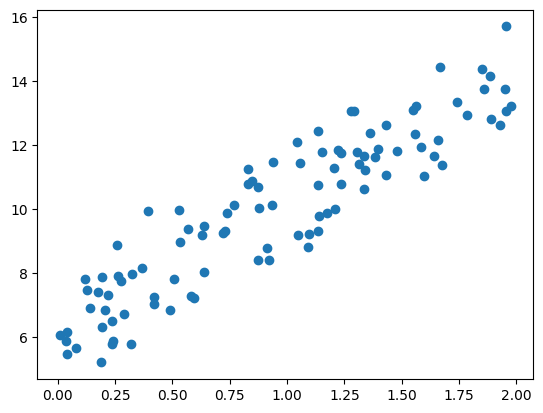

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)
plt.scatter(X,y)

In [5]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    y_pred=np.dot(X,w1.T)+w0
    diff=y-y_pred
    w0_factors=np.ones((N,1))
    N=len(y)
    cost=np.sum(np.square(diff))/N
    print(f'mse : {cost}')
    w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update,w0_update

def gradient_descent_steps(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        # print(f"w1: {w1},w0:{w0}")
        
    return w1,w0

def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost



In [6]:
w1:4.021813642697164,w0:6.162031224717461
w1:3.970589958831431,w0:6.219759127660951

SyntaxError: invalid syntax (849487869.py, line 1)

In [7]:
%timeit w1,w0=gradient_descent_steps(X,y,iters=2000)
print(f"w1:{w1[0,0]},w0:{w0[0,0]}")
y_pred=w1[0,0]*X+w0
print(f"Gradient Descent Total Cost: {get_cost(y,y_pred)}")

mse : 105.72278229095672
mse : 97.29699213674446
mse : 89.55269770638449
mse : 82.43475476782086
mse : 75.89248131648746
mse : 69.87929649443328
mse : 64.35238872790998
mse : 59.27241071908023
mse : 54.60319911882601
mse : 50.311516883476685
mse : 46.366816479886026
mse : 42.741022251821796
mse : 39.40833039714525
mse : 36.34502513072504
mse : 33.52930972334496
mse : 30.941151212848624
mse : 28.56213768117102
mse : 26.375347080432643
mse : 24.365226673552264
mse : 22.517482230457652
mse : 20.81897619047653
mse : 19.257634065369572
mse : 17.822358416177217
mse : 16.5029497910116
mse : 15.290034060517717
mse : 14.174995633308065
mse : 13.149916075566571
mse : 12.20751769751944
mse : 11.341111704856846
mse : 10.544550545712166
mse : 9.812184113696619
mse : 9.138819494959423
mse : 8.519683972492954
mse : 7.950391024108402
mse : 7.426909071835844
mse : 6.945532760104952
mse : 6.502856558078873
mse : 6.095750498072059
mse : 5.721337877201359
mse : 5.376974763406622
mse : 5.060231159832256
ms

NameError: name 'w1' is not defined

NameError: name 'y_pred' is not defined

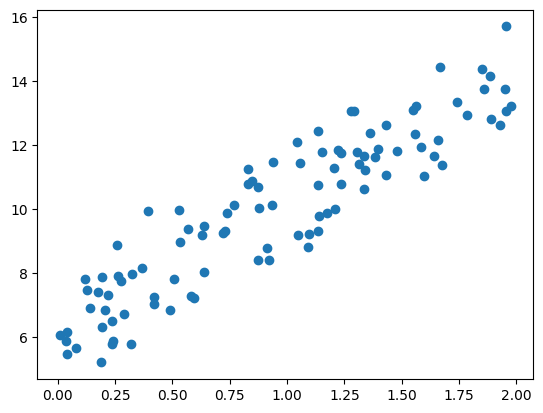

In [8]:
plt.scatter(X,y)
plt.plot(X , y_pred, c='red')

#### sklearn.linear_model.LinearRegression
* class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X_train,X_test,y_train,y_tset = train_test_split(diabetes.data,diabetes.target,test_size = 0.2,random_state = 0)
diabetes
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

In [10]:
import pandas as pd

house_df = pd.read_csv('./datasets/housing.csv' , header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']  , sep='\s+')

In [11]:
# 상관관계 HeatMap
features = house_df.drop('MEDV' ,axis=1) 
label = house_df['MEDV']
corr = features.corr()
corr.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [12]:
%matplotlib inline
 
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

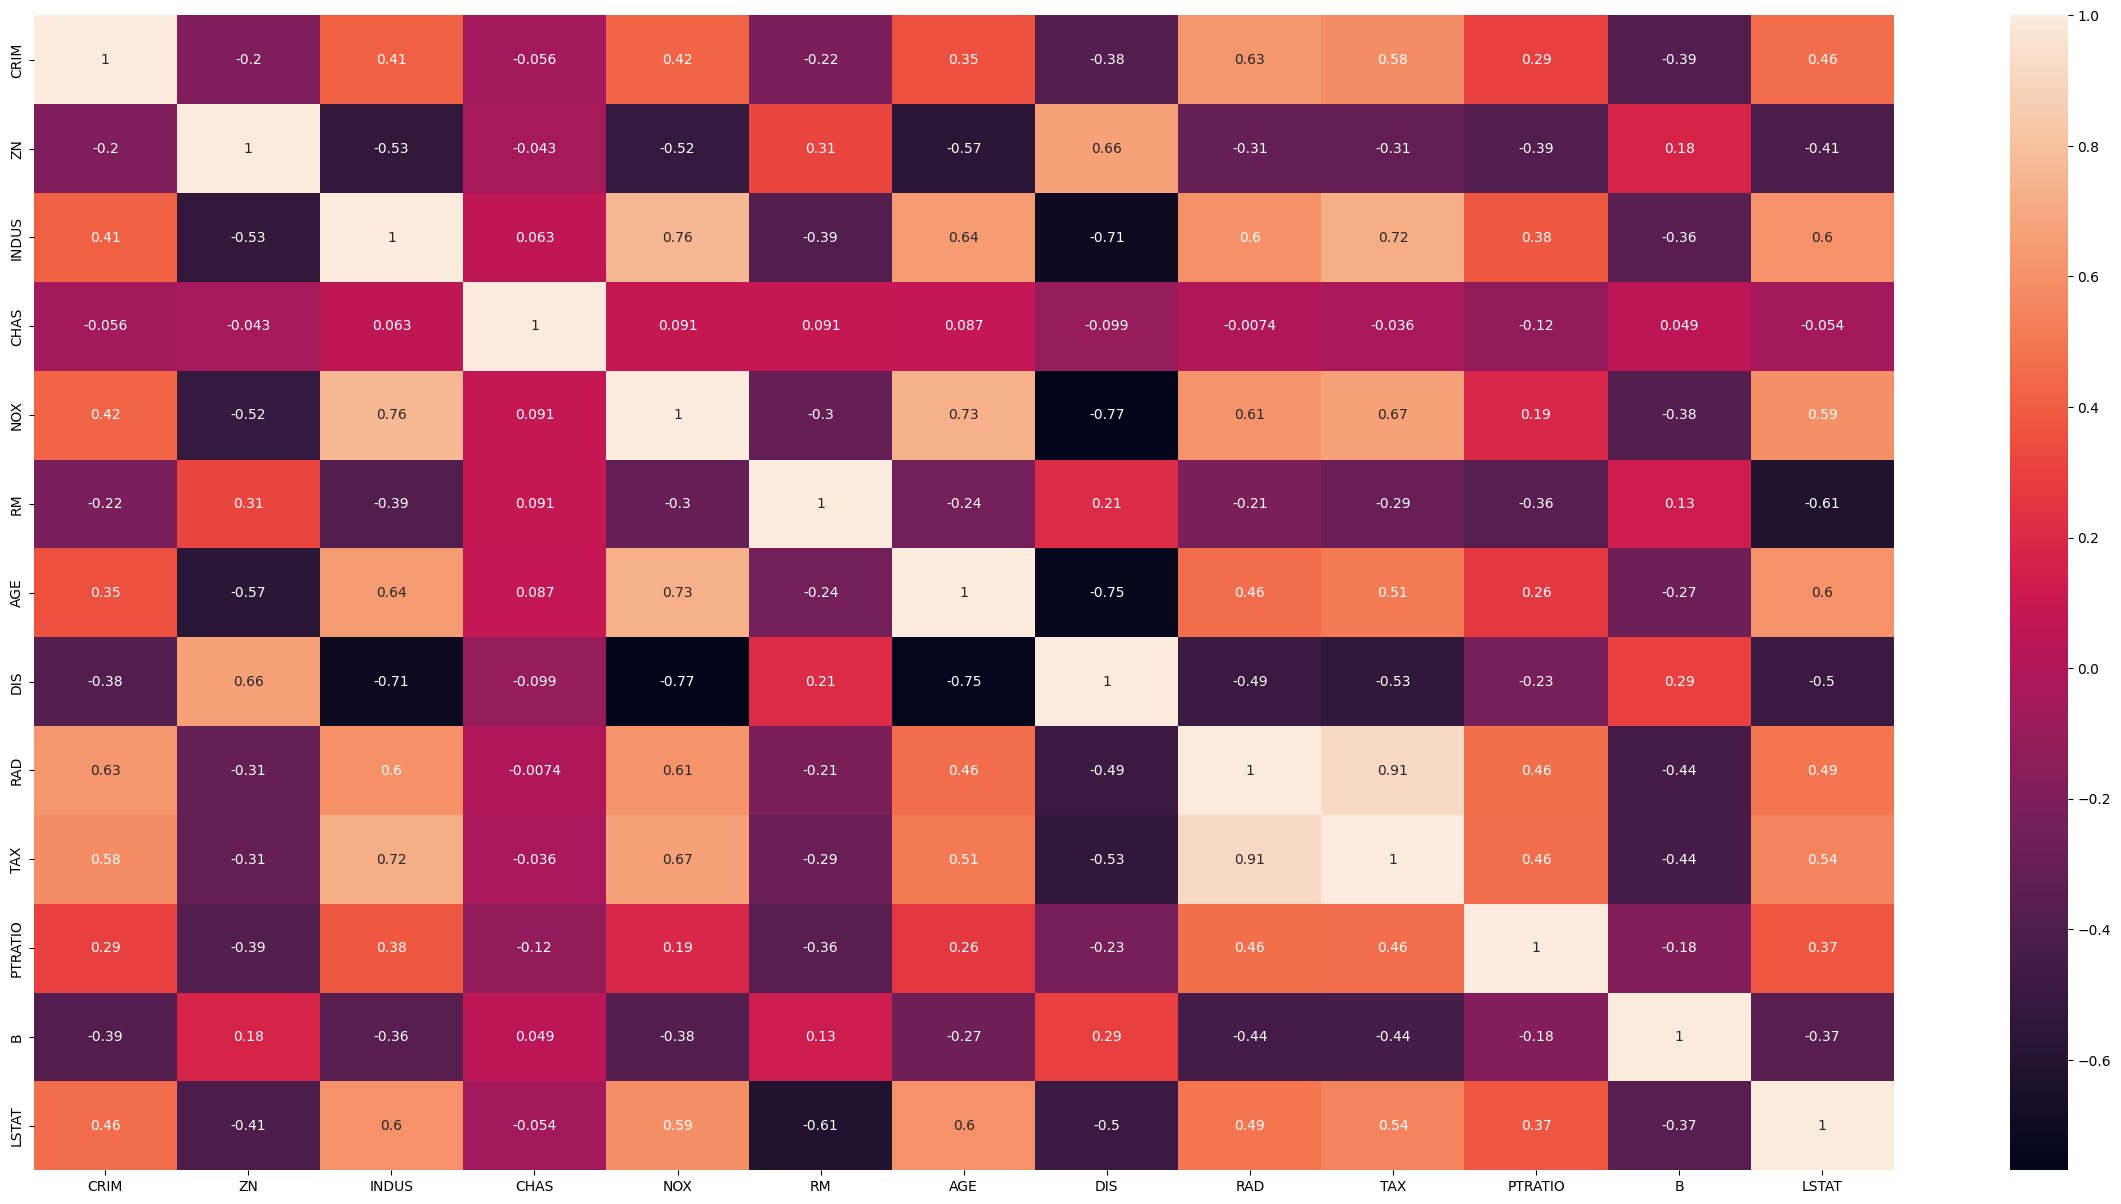

In [13]:
plt.figure(figsize=(30, 15)) 
sns.heatmap(corr, annot=True)


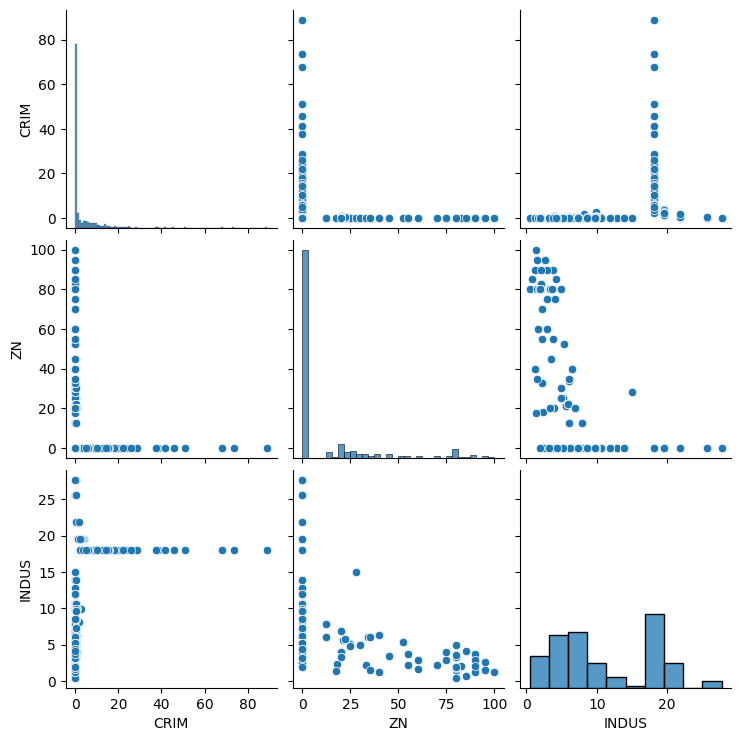

In [14]:
from patsy import dmatrices
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(features[['CRIM','ZN','INDUS']]);

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('MEDV ~ CRIM+ZN + INDUS + CHAS+ NOX + RM + AGE+ DIS + RAD + TAX + PTRATIO + B + LSTAT ', house_df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,CRIM
2,2.298758,ZN
3,3.991596,INDUS
4,1.073995,CHAS
5,4.393720,NOX
6,1.933744,RM
7,3.100826,AGE
8,3.955945,DIS
9,7.484496,RAD


In [17]:
df =house_df.drop(['RAD', 'TAX'] ,axis=1)
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [18]:
features = df.drop('MEDV' ,axis=1) 
label = df['MEDV']
corr = features.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.232471,0.291512,-0.496996
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,1.000000,-0.177383,0.374044
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.177383,1.000000,-0.366087


<Axes: >

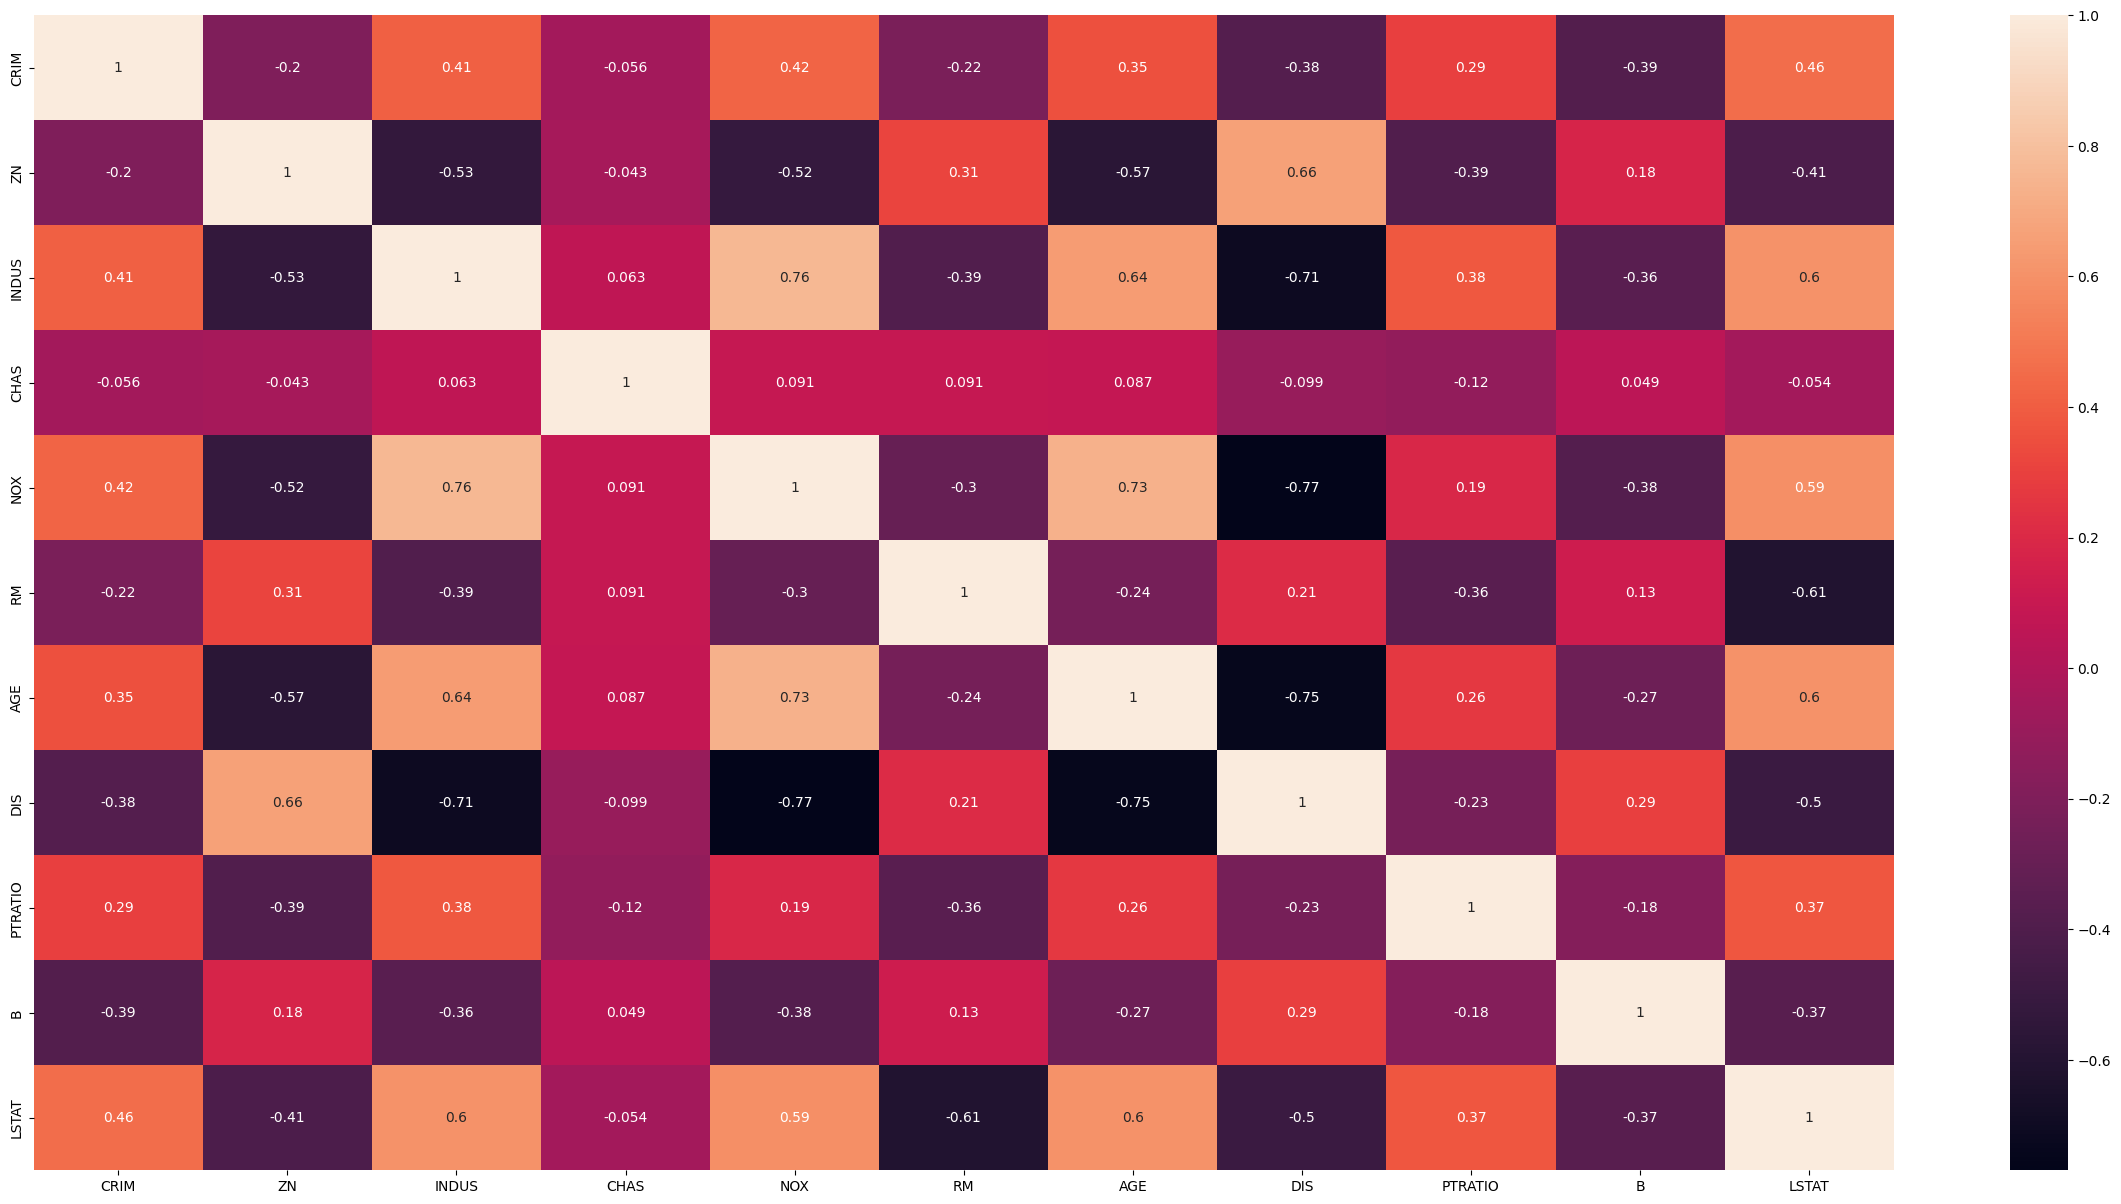

In [19]:
plt.figure(figsize=(30, 15)) 
sns.heatmap(corr, annot=True)

In [20]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,22.000000,396.900000,37.970000


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(features , label , test_size=0.2 , random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
# lr.fit(scaled_X_train , y_train)
cross_val_score(lr ,X=scaled_X_train, y=y_train,  cv=3 , scoring='neg_mean_squared_error')

array([-25.60304518, -24.75144126, -21.49544997])

In [24]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler ,StandardScaler 
from sklearn.model_selection import cross_val_score

X_train, X_test , y_train , y_test = train_test_split(features , label , test_size=0.2 , random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test) 

poly = PolynomialFeatures(degree=2)
poly.fit(scaled_X_train)
poly_X_train = poly.fit_transform(scaled_X_train)
poly_X_test  = poly.fit_transform(scaled_X_test)


lr = LinearRegression()
lr.fit(scaled_X_train ,y_train )
# lr.fit(scaled_X_train , y_train)
result = cross_val_score(lr ,X=scaled_X_train, y=y_train,  cv=3 , scoring='neg_mean_squared_error')
print(f'not poly: {result}')


from sklearn.metrics import r2_score
y_preds = lr.predict(scaled_X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print(f'not poly mse: {mse} , rmse : {rmse}')
print(f'not poly Variance score : {r2_score(y_test, y_preds):.3f}')

lr.fit(poly_X_train ,y_train )
# lr.fit(scaled_X_train , y_train)
result = cross_val_score(lr ,X=poly_X_train, y=y_train,  cv=3 , scoring='neg_mean_squared_error')
print(f'not poly: {result}')

from sklearn.metrics import r2_score
y_preds = lr.predict(poly_X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'poly mse: {mse} , rmse : {rmse}')
print(f'poly Variance score : {r2_score(y_test, y_preds):.3f}')

not poly: [-25.60304518 -24.75144126 -21.49544997]
not poly mse: 26.49889077541537 , rmse : 5.147707331950348
not poly Variance score : 0.639
not poly: [-102.8059673   -32.83757611  -14.32260462]
poly mse: 16.235933131073036 , rmse : 4.029383716038104
poly Variance score : 0.779
